In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import json
import pandas as pd
import funciones_movimientos as fm #Funciones customizadas
import funciones_fechas as ff #Funciones customizadas
import psycopg2
from datetime import date, datetime, timedelta


In [2]:
conn = psycopg2.connect("host='postgre-sqltest.cpdeokpzufj1.us-west-2.rds.amazonaws.com' port=5432 dbname='postgres' user=xseed password=LosTilos114")
crs = {'init': 'epsg:4326'}

def cast_date(date):
    return datetime.strptime(date, '%Y-%m-%d')

In [3]:
query = '''
SELECT  uts.anual_total_use_day, uts.date, wc.precipitation, wc.temp_max, wc.temp_media, wc.temp_min, wc.wind_speed,
       aq.dioxido_nitrogeno
FROM user_total_statistics uts
left join weather_conditions wc on wc.date = uts.date
left join air_quality aq on aq.date = uts.date
'''

data_usos = pd.read_sql(query, conn)


In [2]:
data_usos['date'] = [str(i) for i in data_usos.date]
data_usos['date'] = data_usos.date.apply(cast_date)


NameError: name 'data_usos' is not defined

In [5]:
data_usos['season'] = data_usos.apply(ff.get_season_row, axis = 1)

In [6]:
data_usos['weekend'] = data_usos.date.apply(ff.isWeekend)

In [8]:
data_usos.to_csv('usos_para_modelo.csv')

In [3]:
data_usos = pd.read_csv('usos_para_modelo.csv', index_col = 0)

In [5]:
data_usos = data_usos.drop('Unnamed: 0', 1)

In [16]:
data_usos.tail()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year
1648,7282,2018-12-27,0.0,10.5,6.2,2.0,0.6,50.0,Invierno,0,3,12,2018
1649,7386,2018-12-28,0.0,12.7,7.1,1.5,1.4,46.0,Invierno,0,4,12,2018
1650,5584,2018-12-29,0.0,11.9,8.0,4.0,1.7,31.0,Invierno,1,5,12,2018
1651,5114,2018-12-30,0.0,14.2,8.7,3.2,1.1,38.0,Invierno,1,6,12,2018
1652,4718,2018-12-31,0.0,13.4,7.0,0.7,0.6,61.0,Invierno,0,0,12,2018


In [7]:
data_usos['date'] = data_usos.date.apply(cast_date)

In [14]:
data_usos['day'] = data_usos.apply(lambda fila: fila.date.weekday(), axis=1)
data_usos['month'] = data_usos.apply(lambda fila: fila.date.month, axis=1)
data_usos['year'] = data_usos.apply(lambda fila: fila.date.year, axis=1)

In [9]:
data_usos = data_usos.sort_values('date', ascending=True)

In [10]:
data_usos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 2 to 1652
Data columns (total 13 columns):
anual_total_use_day    1653 non-null int64
date                   1653 non-null datetime64[ns]
precipitation          1651 non-null float64
temp_max               1651 non-null float64
temp_media             1651 non-null float64
temp_min               1651 non-null float64
wind_speed             1651 non-null float64
dioxido_nitrogeno      1650 non-null float64
season                 1653 non-null object
weekend                1653 non-null int64
day                    1653 non-null int64
month                  1653 non-null int64
year                   1653 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(5), object(1)
memory usage: 180.8+ KB


In [21]:
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 14, 10
sns.set_context('talk')
sns.set_style("darkgrid")

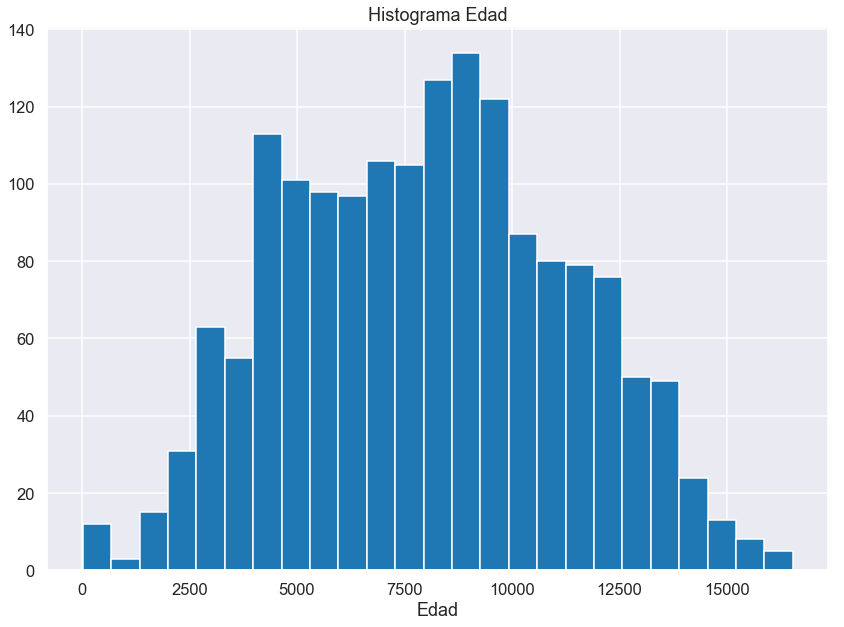

In [44]:
g = plt.hist(data_usos.anual_total_use_day, bins=25)

plt.title('Histograma Usos Diarios')
plt.xlabel('Usos Diarios')
plt.ylabel('Frecuencia')
plt.show()

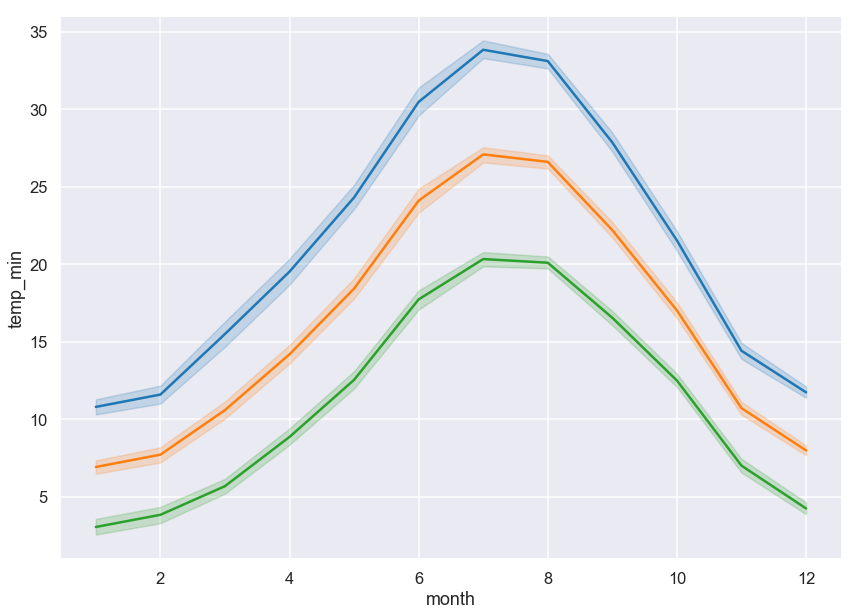

In [63]:
sns.lineplot(data=data_usos, x='month',
                   y='temp_max', palette="Set2",
                   linewidth=2.5, legend='full')
sns.lineplot(data=data_usos, x='month',
                   y='temp_media', palette="Set2",
                   linewidth=2.5, legend='full')
sns.lineplot(data=data_usos, x='month',
                   y='temp_min', palette="Set2",
                   linewidth=2.5, legend='full')

In [46]:
data_usos.mean()

anual_total_use_day    8028.435572
precipitation             1.095094
temp_max                 21.585706
temp_media               16.477529
temp_min                 11.367898
wind_speed                1.747426
dioxido_nitrogeno        30.756970
weekend                   0.285541
day                       2.998185
month                     6.851180
year                   2016.209316
dtype: float64

In [49]:
data_usos.var()

anual_total_use_day    1.059296e+07
precipitation          1.247115e+01
temp_max               8.351703e+01
temp_media             6.247936e+01
temp_min               4.717645e+01
wind_speed             9.903858e-01
dioxido_nitrogeno      2.726983e+02
weekend                2.041310e-01
month                  1.172239e+01
year                   1.746717e+00
dtype: float64

In [43]:
data_usos[(data_usos.year == 2018) & (data_usos.month == 12)].anual_total_use_day.sum()

250887

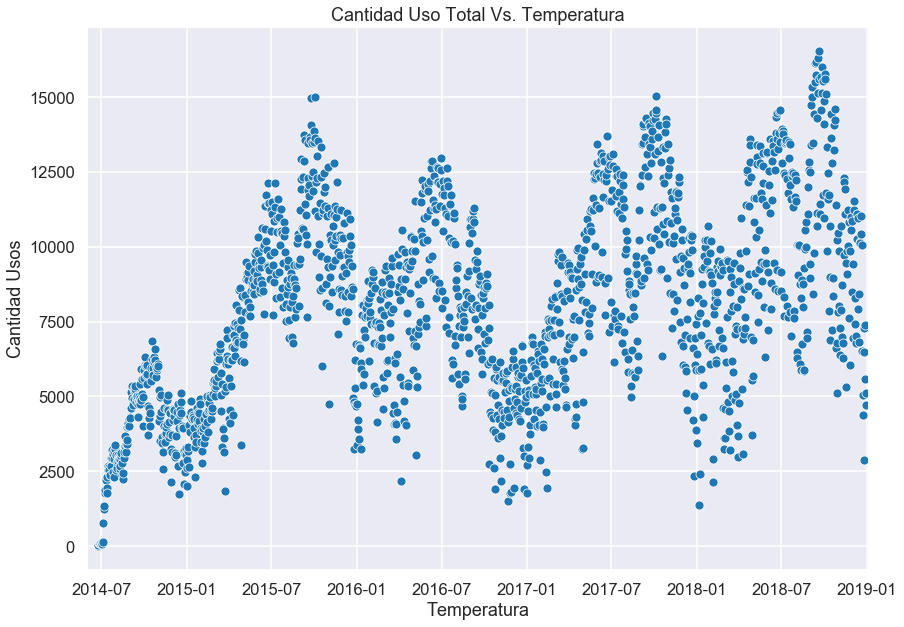

In [45]:
out = sns.scatterplot(x='date', y='anual_total_use_day', data=data_usos)
plt.xlim('2014-06-01', '2019-01-05')
plt.xlabel('Temperatura')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Total Vs. Temperatura')
plt.show()

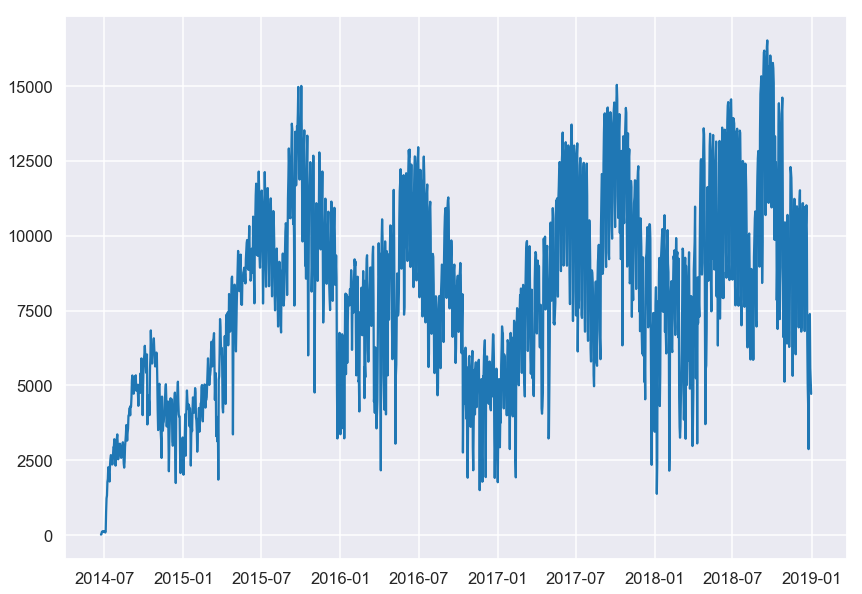

In [80]:
plt.plot(data_usos.date, data_usos.anual_total_use_day)
plt.show()

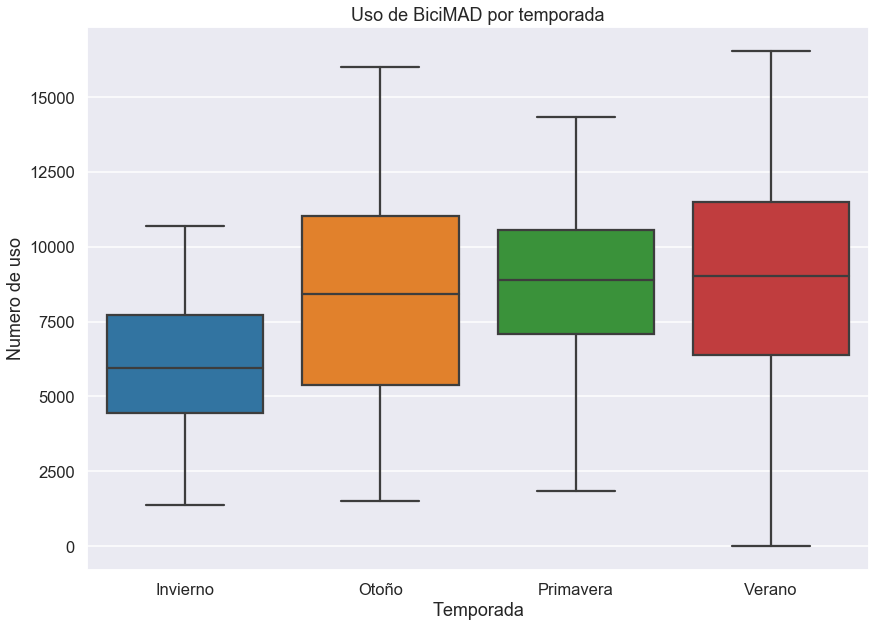

In [72]:
g = sns.boxplot(x='season', y='anual_total_use_day', data=data_usos)

plt.title('Uso de BiciMAD por temporada')
plt.xlabel('Temporada')
plt.ylabel("Numero de uso")
plt.show()

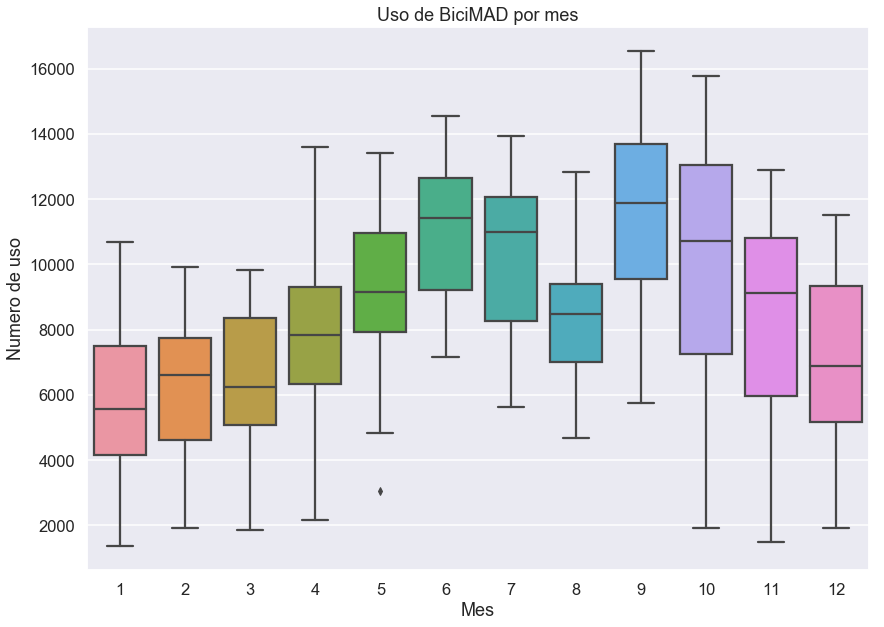

In [84]:
g = sns.boxplot(x='month', y='anual_total_use_day', data=data_usos[(data_usos.year != 2014)])

plt.title('Uso de BiciMAD por mes')
plt.xlabel('Mes')
plt.ylabel("Numero de uso")
plt.show()

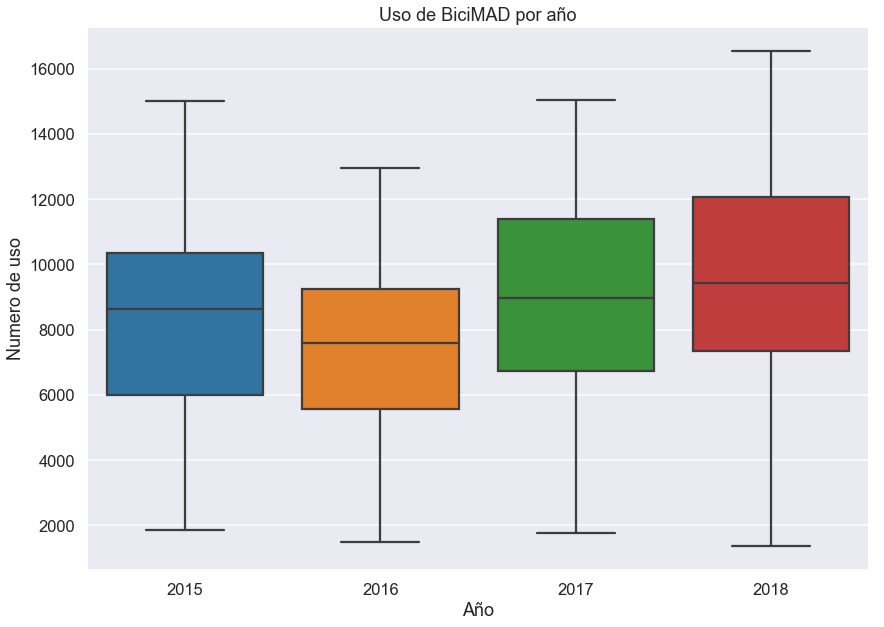

In [25]:
g = sns.boxplot(x='year', y='anual_total_use_day', data=data_usos[(data_usos.year != 2014)])

plt.title('Uso de BiciMAD por año')
plt.xlabel('Año')
plt.ylabel("Numero de uso")
plt.show()

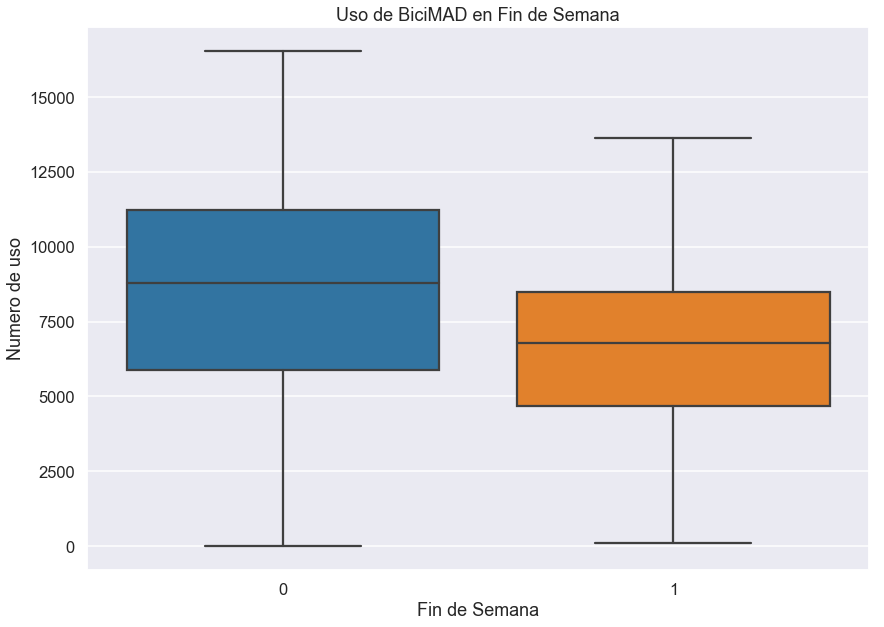

In [73]:
g = sns.boxplot(x='weekend', y='anual_total_use_day', data=data_usos)

plt.title('Uso de BiciMAD en Fin de Semana')
plt.xlabel('Fin de Semana')
plt.ylabel("Numero de uso")
plt.show()

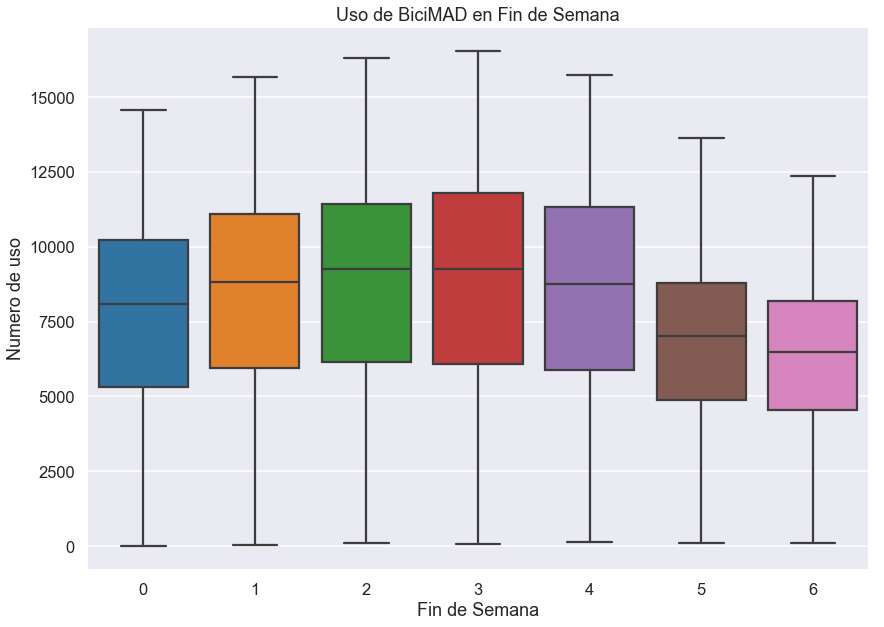

In [24]:
g = sns.boxplot(x='day', y='anual_total_use_day', data=data_usos)

plt.title('Uso de BiciMAD en Fin de Semana')
plt.xlabel('Fin de Semana')
plt.ylabel("Numero de uso")
plt.show()

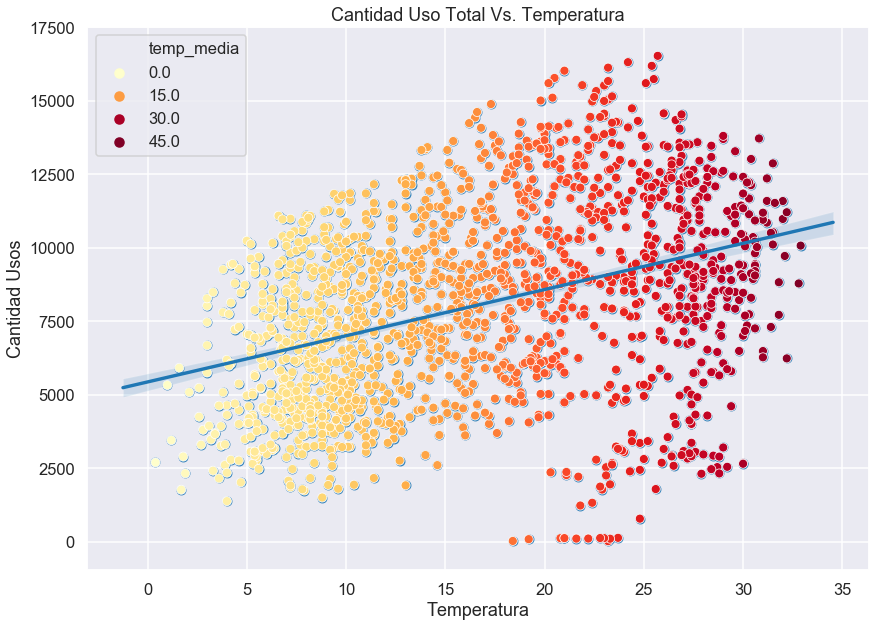

In [23]:
out = sns.regplot(x='temp_media', y='anual_total_use_day', data=data_usos )
out = sns.scatterplot(x='temp_media', y='anual_total_use_day', data=data_usos , hue='temp_media', palette='YlOrRd')

plt.xlabel('Temperatura')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Total Vs. Temperatura')
plt.show()

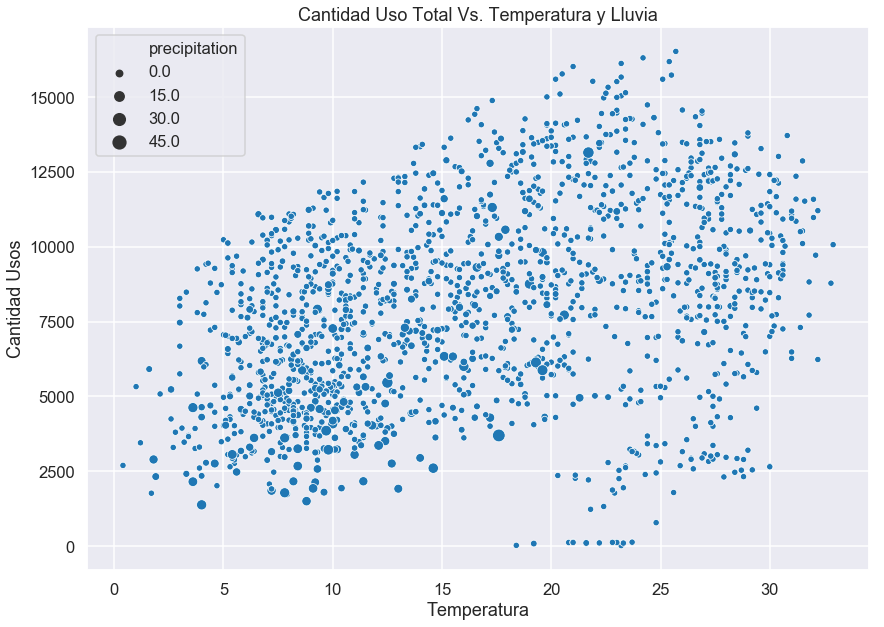

In [53]:
out = sns.scatterplot(x='temp_media', y='anual_total_use_day', size='precipitation', data=data_usos)

plt.xlabel('Temperatura')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Total Vs. Temperatura y Lluvia')
plt.show()

In [ ]:
data_usos.season = data_usos.season.astype('category')
data_usos.weekend = data_usos.weekend.astype('category')
data_usos.month = data_usos.month.astype('category')
data_usos.year = data_usos.year.astype('category')

In [52]:
data_usos.head()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year
2,17,2014-06-23,0.0,29.7,23.2,16.6,1.7,20.0,Verano,0,0,6,2014
3,24,2014-06-24,0.0,19.8,18.4,17.0,1.7,17.0,Verano,0,1,6,2014
0,105,2014-06-25,1.7,27.0,21.6,16.2,1.4,20.0,Verano,0,2,6,2014
4,120,2014-06-26,0.4,26.2,20.8,15.5,0.6,21.0,Verano,0,3,6,2014
5,131,2014-06-27,0.0,30.4,23.7,17.0,2.2,23.0,Verano,0,4,6,2014


In [54]:
data_usos.to_csv('usos_para_modelo2.csv')

In [5]:
data_usos = pd.read_csv('usos_para_modelo2.csv', index_col = False)
data_usos = data_usos.drop('Unnamed: 0', 1)
data_usos.head()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year
0,17,2014-06-23,0.0,29.7,23.2,16.6,1.7,20.0,Verano,0,0,6,2014
1,24,2014-06-24,0.0,19.8,18.4,17.0,1.7,17.0,Verano,0,1,6,2014
2,105,2014-06-25,1.7,27.0,21.6,16.2,1.4,20.0,Verano,0,2,6,2014
3,120,2014-06-26,0.4,26.2,20.8,15.5,0.6,21.0,Verano,0,3,6,2014
4,131,2014-06-27,0.0,30.4,23.7,17.0,2.2,23.0,Verano,0,4,6,2014


In [7]:
data_usos[data_usos.day==6]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year
6,107,2014-06-29,0.0,28.3,22.2,16.2,1.9,10.0,Verano,1,6,6,2014
13,1230,2014-07-06,0.0,26.1,21.8,17.5,3.6,11.0,Verano,1,6,7,2014
20,1790,2014-07-13,0.0,33.2,25.6,18.0,2.5,12.0,Verano,1,6,7,2014
27,2371,2014-07-20,0.0,26.2,21.1,16.0,2.8,9.0,Verano,1,6,7,2014
34,2321,2014-07-27,0.0,35.7,28.8,22.0,1.7,13.0,Verano,1,6,7,2014
41,2624,2014-08-03,0.0,29.2,23.4,17.6,1.4,9.0,Verano,1,6,8,2014
48,2687,2014-08-10,0.0,32.2,25.9,19.6,2.5,11.0,Verano,1,6,8,2014
55,2444,2014-08-17,0.0,32.2,24.8,17.5,1.7,11.0,Verano,1,6,8,2014
62,3421,2014-08-24,0.0,31.8,25.2,18.6,1.9,15.0,Verano,1,6,8,2014
69,4323,2014-08-31,0.0,33.6,27.6,21.6,1.1,14.0,Verano,1,6,8,2014


In [8]:
tmp = data_usos[data_usos.year!=2014]

In [9]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 192 to 1652
Data columns (total 13 columns):
anual_total_use_day    1461 non-null int64
date                   1461 non-null object
precipitation          1459 non-null float64
temp_max               1459 non-null float64
temp_media             1459 non-null float64
temp_min               1459 non-null float64
wind_speed             1459 non-null float64
dioxido_nitrogeno      1458 non-null float64
season                 1461 non-null object
weekend                1461 non-null int64
day                    1461 non-null int64
month                  1461 non-null int64
year                   1461 non-null int64
dtypes: float64(6), int64(5), object(2)
memory usage: 159.8+ KB


In [10]:
tmp['day'].value_counts(dropna=False)

6    209
5    209
4    209
3    209
0    209
2    208
1    208
Name: day, dtype: int64

In [3]:
query = '''
SELECT DATE(b.unplug_hourtime), count(b.idunplug_station)
FROM bike_movement as b
JOIN station as s
ON b.idunplug_station = s.id
WHERE s.name = 'Plaza de la Cebada' and b.user_type_code <> 3
GROUP BY DATE(unplug_hourtime)
HAVING DATE(unplug_hourtime) > '2017-12-31' and DATE(unplug_hourtime) < '2019-01-01'
ORDER BY DATE(unplug_hourtime)
'''

plaza_cebada = pd.read_sql(query, conn)


In [28]:
plaza_cebada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
date     347 non-null object
count    347 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [35]:
plaza_cebada.head()

,date,count
0,2018-01-01,46
1,2018-01-02,71
2,2018-01-03,95
3,2018-01-04,103
4,2018-01-05,75


In [40]:
plaza_cebada.loc[180:240]

,date,count
180,2018-07-09,170
181,2018-07-10,164
182,2018-07-11,193
183,2018-07-12,174
184,2018-07-13,161
185,2018-07-14,121
186,2018-07-15,142
187,2018-07-16,146
188,2018-07-17,159
189,2018-07-18,171


In [38]:
plaza_cebada = plaza_cebada.drop(224)

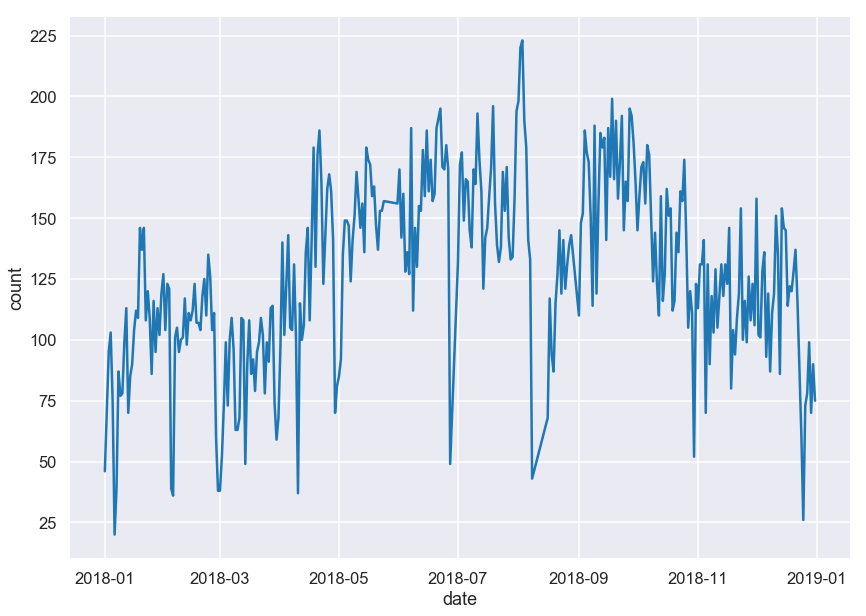

In [39]:
sns.lineplot(data=plaza_cebada, x='date',
                   y='count', palette="Set2",
                   linewidth=2.5, legend='full')

In [17]:
data_set = pd.read_csv('data_final', index_col = 0)

In [13]:
data_set.head()
data_set.tail()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2
1457,7282,2018-12-27,0.0,10.5,6.2,2.0,0.6,50.0,1,0,3,12,2018,557,0,0,110.25
1458,7386,2018-12-28,0.0,12.7,7.1,1.5,1.4,46.0,1,0,4,12,2018,558,0,0,161.29
1459,5584,2018-12-29,0.0,11.9,8.0,4.0,1.7,31.0,1,1,5,12,2018,558,0,0,141.61
1460,5114,2018-12-30,0.0,14.2,8.7,3.2,1.1,38.0,1,1,6,12,2018,559,0,0,201.64
1461,4718,2018-12-31,0.0,13.4,7.0,0.7,0.6,61.0,1,0,0,12,2018,559,0,0,179.56


In [7]:
data_set.describe()

,anual_total_use_day,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2
count,1461.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1459.000000
mean,8587.400411,1.103290,21.352433,16.231666,11.108636,1.749075,31.714678,2.503080,0.286105,3.002053,6.522930,2016.499658,731.668036,0.035592,0.727584,540.449678
std,2995.747238,3.491444,9.196806,7.958325,6.917999,1.016681,16.519810,1.115039,0.452094,2.001197,3.449884,1.118111,119.264699,0.185334,0.445355,419.019990
min,1379.000000,0.000000,2.800000,0.400000,-3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000,556.000000,0.000000,0.000000,7.840000
25%,6274.000000,0.000000,13.300000,9.200000,5.200000,1.100000,19.000000,2.000000,0.000000,1.000000,4.000000,2016.000000,616.000000,0.000000,0.000000,176.890000
50%,8593.000000,0.000000,20.300000,15.400000,10.500000,1.700000,28.000000,3.000000,0.000000,3.000000,7.000000,2016.000000,733.000000,0.000000,1.000000,412.090000
75%,10814.000000,0.000000,29.000000,23.000000,17.000000,2.200000,41.000000,3.000000,1.000000,5.000000,10.000000,2017.000000,848.000000,0.000000,1.000000,841.000000
max,16529.000000,28.900000,40.000000,32.900000,25.900000,6.400000,111.000000,4.000000,1.000000,6.000000,12.000000,2018.000000,903.000000,1.000000,1.000000,1600.000000


In [12]:
data_set.iloc[810:860,]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2
811,8200,2017-03-21,0.0,16.5,12.6,8.8,2.5,19.0,2,0,1,3,2017,730,0,1,272.25
812,6181,2017-03-22,2.4,12.2,7.6,2.9,2.5,17.0,2,0,2,3,2017,733,0,1,148.84
813,5235,2017-03-23,5.1,5.3,2.6,0.0,0.8,29.0,2,0,3,3,2017,736,0,1,28.09
814,5633,2017-03-24,4.5,9.5,5.4,1.3,0.8,34.0,2,0,4,3,2017,738,0,1,90.25
815,4698,2017-03-25,2.9,9.3,4.4,-0.4,1.4,37.0,2,1,5,3,2017,741,0,1,86.49
816,4645,2017-03-26,2.1,15.3,10.4,5.5,1.7,14.0,2,1,6,3,2017,744,0,1,234.09
817,6577,2017-03-27,0.1,13.8,10.2,6.6,3.1,18.0,2,0,0,3,2017,746,0,1,190.44
818,8513,2017-03-28,0.0,17.9,12.7,7.5,0.8,34.0,2,0,1,3,2017,749,0,1,320.41
819,9173,2017-03-29,0.0,20.3,13.4,6.5,0.8,47.0,2,0,2,3,2017,752,0,1,412.09
820,9459,2017-03-30,0.0,21.1,15.0,9.0,1.7,45.0,2,0,3,3,2017,754,0,1,445.21


In [18]:
test = data_set.iloc[821:,]

In [18]:
test.tail()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2
1457,7282,2018-12-27,0.0,10.5,6.2,2.0,0.6,50.0,1,0,3,12,2018,557,0,0,110.25
1458,7386,2018-12-28,0.0,12.7,7.1,1.5,1.4,46.0,1,0,4,12,2018,558,0,0,161.29
1459,5584,2018-12-29,0.0,11.9,8.0,4.0,1.7,31.0,1,1,5,12,2018,558,0,0,141.61
1460,5114,2018-12-30,0.0,14.2,8.7,3.2,1.1,38.0,1,1,6,12,2018,559,0,0,201.64
1461,4718,2018-12-31,0.0,13.4,7.0,0.7,0.6,61.0,1,0,0,12,2018,559,0,0,179.56


In [12]:
query = '''
SELECT DATE(b.unplug_hourtime) as date, count(b.idunplug_station) as plaza_cebada
FROM bike_movement as b
JOIN station as s
ON b.idunplug_station = s.id
WHERE s.name = 'Plaza de la Cebada' and b.user_type_code <> 3 and b.unplug_hourtime < '2019-01-01'
GROUP BY DATE(unplug_hourtime)
ORDER BY DATE(unplug_hourtime)
'''

plz_cebada = pd.read_sql(query, conn)


In [16]:
plz_cebada.tail()
plz_cebada.iloc[420:440,]

,date,plaza_cebada
422,2018-06-17,174
423,2018-06-18,157
424,2018-06-19,160
425,2018-06-20,187
426,2018-06-21,191
427,2018-06-22,195
428,2018-06-23,171
429,2018-06-24,170
430,2018-06-25,180
431,2018-06-26,170


In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 10
sns.set_context('talk')
sns.set_style("darkgrid")

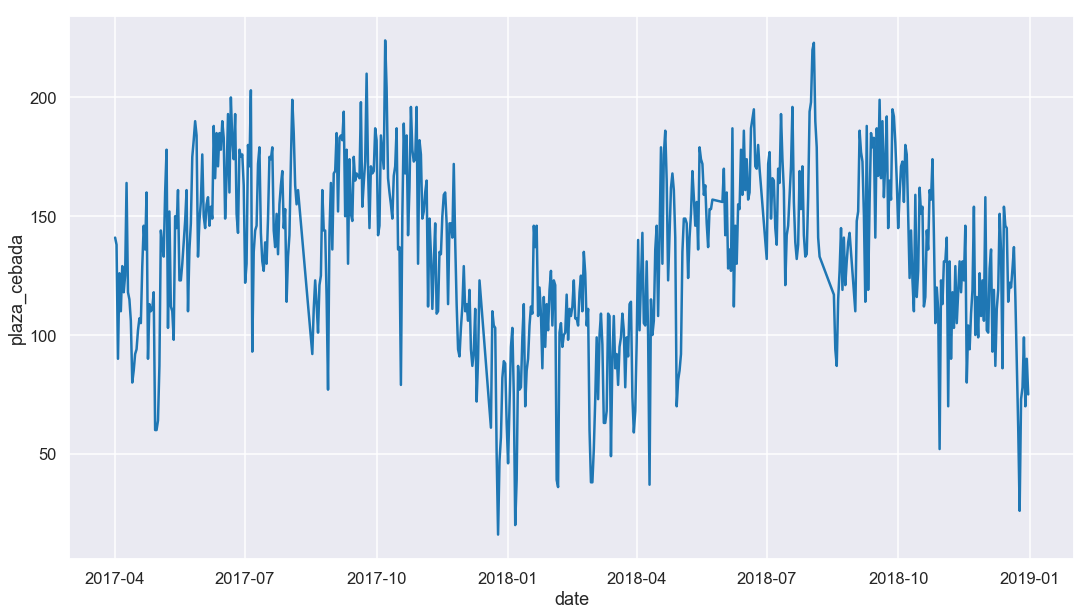

In [7]:
sns.lineplot(data=plz_cebada, x='date',
                   y='plaza_cebada',
                   linewidth=2.5, legend='full')

In [13]:
plz_cebada = plz_cebada.drop([248, 485, 471, 129, 472, 432])

In [8]:
plz_cebada = plz_cebada.apply(lambda fila: fila.str.strip() if fila.dtype == 'object' else fila)

In [ ]:
plz_cebada['date'] = plz_cebada['date'].str[:11]

In [15]:
plz_cebada['date'] = [str(i) for i in plz_cebada.date]
plz_cebada['date'] = plz_cebada.date.apply(cast_date)

In [19]:
test['date'] = [str(i) for i in test.date]
test['date'] = test.date.apply(cast_date)

C:\Users\alejo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alejo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
plz_cebada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 607
Data columns (total 2 columns):
date            602 non-null datetime64[ns]
plaza_cebada    602 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 14.1 KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 822 to 1461
Data columns (total 17 columns):
anual_total_use_day    640 non-null int64
date                   640 non-null datetime64[ns]
precipitation          638 non-null float64
temp_max               638 non-null float64
temp_media             638 non-null float64
temp_min               638 non-null float64
wind_speed             638 non-null float64
dioxido_nitrogeno      640 non-null float64
season                 640 non-null int64
weekend                640 non-null int64
day                    640 non-null int64
month                  640 non-null int64
year                   640 non-null int64
min_sun                640 non-null int64
holiday                640 non-null int64
unicom                 640 non-null int64
temp_max2              638 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(9)
memory usage: 90.0 KB


In [23]:
pc_dia = test.merge(plz_cebada, how ='left', on = 'date')

In [24]:
pc_dia.head()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,plaza_cebada
0,6999,2017-04-01,0.0,17.3,12.6,8.0,3.3,9.0,2,1,5,4,2017,760,0,1,299.29,141.0
1,6737,2017-04-02,0.0,19.0,12.8,6.7,2.2,16.0,2,1,6,4,2017,762,0,1,361.00,138.0
2,8290,2017-04-03,0.0,19.3,12.5,5.7,1.1,26.0,2,0,0,4,2017,765,0,1,372.49,90.0
3,9173,2017-04-04,0.0,22.0,14.5,7.0,1.4,39.0,2,0,1,4,2017,768,0,1,484.00,126.0
4,8953,2017-04-05,0.0,19.0,13.6,8.2,3.1,16.0,2,0,2,4,2017,770,0,1,361.00,110.0


In [88]:
pc_dia.iloc[490:510,]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,plaza_cebada
490,6486,2018-08-04,0.0,38.6,31.0,23.4,0.0,14.0,3,1,5,8,2018,852,0,0,1489.96,190.0
491,6272,2018-08-05,0.0,37.6,31.0,24.4,0.8,11.0,3,1,6,8,2018,850,0,0,1413.76,179.0
492,9057,2018-08-06,0.0,36.9,30.6,24.4,1.7,29.0,3,0,0,8,2018,848,0,0,1361.61,141.0
493,10022,2018-08-07,0.0,36.7,30.7,24.7,2.8,23.0,3,0,1,8,2018,845,0,0,1346.89,133.0
494,10016,2018-08-08,0.0,34.6,27.9,21.2,2.8,23.0,3,0,2,8,2018,843,0,0,1197.16,NaN
495,10077,2018-08-09,0.0,31.3,25.4,19.5,2.2,16.0,3,0,3,8,2018,841,0,0,979.69,NaN
496,8756,2018-08-10,0.0,31.3,24.4,17.5,2.2,11.0,3,0,4,8,2018,839,0,0,979.69,NaN
497,6099,2018-08-11,0.0,33.7,27.9,22.1,1.4,10.0,3,1,5,8,2018,837,0,0,1135.69,NaN
498,5868,2018-08-12,0.0,35.0,29.2,23.3,2.2,14.0,3,1,6,8,2018,834,0,0,1225.00,NaN
499,8280,2018-08-13,0.0,33.5,27.5,21.5,2.2,20.0,3,0,0,8,2018,832,0,0,1122.25,NaN


In [25]:
pc_dia2 = pc_dia.copy()


In [68]:
pc_dia2 = pc_dia2.drop(['temp_media', 'temp_max2'], 1)

In [ ]:
def replace_nan(e):
    if e.plaza_cebada is np.NaN and e.month == 1 and weekend == 0 and holiday == 0 and unicom == 0:
        return pc_dia2[(pc_dia2['month'] == '1') & (pc_dia2['weekend'] == 0) & (pc_dia2['holiday'] == 0) & (pc_dia2['unicom'] == 0)].mean()
    elif :
        return e.direccion
    
acc['direccion'] = acc.apply(suma_num, axis = 1)

Queremos encontrar en que meses tiene valores nulos el conjunto de datos. Encontramos que los hay **NaN** en el mes 5, 8 y 12.

In [26]:
pc_dia2[pc_dia2['plaza_cebada'].isnull()]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,plaza_cebada
129,8844,2017-08-08,0.0,30.2,24.0,17.7,1.9,9.0,3,0,1,8,2017,843,0,0,912.04,NaN
130,8764,2017-08-09,0.0,29.8,22.8,15.8,2.2,11.0,3,0,2,8,2017,840,0,0,888.04,NaN
131,8440,2017-08-10,0.0,27.0,19.8,12.5,2.2,7.0,3,0,3,8,2017,838,0,0,729.00,NaN
132,7573,2017-08-11,0.0,28.5,21.0,13.4,1.1,12.0,3,0,4,8,2017,836,0,0,812.25,NaN
133,5341,2017-08-12,0.0,32.4,25.0,17.6,1.4,10.0,3,1,5,8,2017,834,0,0,1049.76,NaN
134,4973,2017-08-13,0.0,33.5,26.8,20.2,1.7,17.0,3,1,6,8,2017,831,0,0,1122.25,NaN
135,6536,2017-08-14,0.0,35.0,28.2,21.3,1.7,12.0,3,0,0,8,2017,829,0,0,1225.00,NaN
136,5781,2017-08-15,0.0,34.6,28.5,22.4,2.8,7.0,3,0,1,8,2017,827,1,0,1197.16,NaN
137,8001,2017-08-16,0.0,34.6,27.6,20.6,1.1,23.0,3,0,2,8,2017,824,0,0,1197.16,NaN
256,9420,2017-12-13,0.0,8.6,4.2,-0.3,0.6,55.0,4,0,2,12,2017,559,0,1,73.96,NaN


In [64]:
pc_dia2[pc_dia2['wind_speed'].isnull()]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,plaza_cebada
110,12439,2017-07-20,0.0,34.1,2.2,2.2,NaN,16.0,3,0,3,7,2017,879,0,0,NaN,179.0


In [227]:
pc_dia2[pc_dia2['month'] == 8]['wind_speed'].value_counts(dropna=False)

 1.1    13
 2.2     9
 1.7     9
 1.4     9
 1.9     8
 0.8     4
 2.8     3
 2.5     3
 0.6     1
 3.6     1
 0.0     1
NaN      1
Name: wind_speed, dtype: int64

In [127]:
import math
def replace_nan_wind(e):
    if e.wind_speed is np.NaN and e.month == 7:
        return pc_dia2[pc_dia2['month'] == 7].mean()
    elif e.wind_speed is math.isnan and e.month == 8:
        return pc_dia2[pc_dia2['month'] == 8].mean()
    else:
        return e.wind_speed
    
pc_dia2['wind_speed2'] = pc_dia2.apply(replace_nan_wind, axis = 1)

In [281]:
pc_dia2.iloc[110:111,]

,anual_total_use_day,date,precipitation,temp_max,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,plaza_cebada
110,12439,2017-07-20,0.0,34.1,20.7,2.2,16.0,3,0,3,7,2017,879,0,0,179.0


In [30]:
pjuly2017 = pc_dia2[(pc_dia2['month'] == 7) & (pc_dia2['year'] == 2017)]
paugust2017 = pc_dia2[(pc_dia2['month'] == 8) & (pc_dia2['year'] == 2017)]

In [278]:
paugust2017.head()

,anual_total_use_day,date,precipitation,temp_max,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,plaza_cebada
122,9935,2017-08-01,0.0,33.0,20.0,1.7,15.0,3,0,1,8,2017,857,0,0,142.0
123,10519,2017-08-02,NaN,NaN,NaN,NaN,26.0,3,0,2,8,2017,855,0,0,173.0
124,10228,2017-08-03,0.0,36.7,22.5,1.4,27.0,3,0,3,8,2017,853,0,0,199.0
125,9207,2017-08-04,0.0,37.5,23.6,1.1,21.0,3,0,4,8,2017,851,0,0,185.0
126,6235,2017-08-05,0.0,39.2,25.1,2.2,16.0,3,1,5,8,2017,849,0,0,163.0


In [69]:
import math
def remNaN_J17_pre(element):
    if math.isnan(element):
        return pjuly2017['precipitation'].median()
    else:
        return element
    
def remNaN_J17_tmax(element):
    if math.isnan(element):
        return pjuly2017['temp_max'].median()
    else:
        return element
    
def remNaN_J17_tmin(element):
    if math.isnan(element):
        return pjuly2017['temp_min'].median()
    else:
        return element
    
def remNaN_J17_wind(element):
    if math.isnan(element):
        return pjuly2017['wind_speed'].median()
    else:
        return element

In [70]:
pc_dia2.iloc[91:121,2] = pc_dia2.precipitation.apply(remNaN_J17_pre)
pc_dia2.iloc[91:121,3] = pc_dia2.temp_max.apply(remNaN_J17_tmax)
pc_dia2.iloc[91:121,4] = pc_dia2.temp_min.apply(remNaN_J17_tmin)
pc_dia2.iloc[91:121,5] = pc_dia2.wind_speed.apply(remNaN_J17_wind)

In [33]:
def remNaN_A17_pre(element):
    if math.isnan(element):
        return paugust2017['precipitation'].median()
    else:
        return element
    
def remNaN_A17_tmax(element):
    if math.isnan(element):
        return paugust2017['temp_max'].median()
    else:
        return element
    
def remNaN_A17_tmin(element):
    if math.isnan(element):
        return paugust2017['temp_min'].median()
    else:
        return element
    
def remNaN_A17_wind(element):
    if math.isnan(element):
        return paugust2017['wind_speed'].median()
    else:
        return element

In [34]:
pc_dia2.loc[122:153, 'precipitation'] = pc_dia2.precipitation.apply(remNaN_A17_pre)
pc_dia2.loc[122:153, 'temp_max'] = pc_dia2.temp_max.apply(remNaN_A17_tmax)
pc_dia2.loc[122:153, 'temp_min'] = pc_dia2.temp_min.apply(remNaN_A17_tmin)
pc_dia2.loc[122:153, 'wind_speed'] = pc_dia2.wind_speed.apply(remNaN_A17_wind)

In [35]:
pc_dia2.iloc[91:121,]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,plaza_cebada
91,8144,2017-07-01,0.0,25.0,12.6,2.2,2.2,4.0,3,1,5,7,2017,900,0,1,625.00,122.0
92,7340,2017-07-02,0.0,31.6,13.4,3.1,3.1,8.0,3,1,6,7,2017,900,0,1,998.56,130.0
93,11905,2017-07-03,0.0,34.0,18.0,0.8,0.8,17.0,3,0,0,7,2017,899,0,1,1156.00,180.0
94,12701,2017-07-04,0.0,35.5,21.0,2.5,2.5,16.0,3,0,1,7,2017,898,0,1,1260.25,171.0
95,13090,2017-07-05,3.5,35.5,21.2,2.2,2.2,13.0,3,0,2,7,2017,897,0,1,1260.25,203.0
96,6135,2017-07-06,25.2,22.2,16.4,2.2,2.2,29.0,3,0,3,7,2017,896,0,1,492.84,93.0
97,7721,2017-07-07,19.3,25.3,15.9,2.2,2.2,27.0,3,0,4,7,2017,895,0,1,640.09,135.0
98,7588,2017-07-08,1.3,24.9,15.8,0.0,0.0,19.0,3,1,5,7,2017,895,0,0,620.01,144.0
99,7862,2017-07-09,0.0,31.5,16.6,1.9,1.9,28.0,3,1,6,7,2017,894,0,0,992.25,146.0
100,11684,2017-07-10,0.0,32.2,18.5,1.9,1.9,17.0,3,0,0,7,2017,892,0,0,1036.84,172.0


In [294]:
pc_dia2.iloc[122:152,]

,anual_total_use_day,date,precipitation,temp_max,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,plaza_cebada
122,9935,2017-08-01,0.0,33.0,20.0,1.7,15.0,3,0,1,8,2017,857,0,0,142.0
123,10519,2017-08-02,0.0,34.6,21.2,1.7,26.0,3,0,2,8,2017,855,0,0,173.0
124,10228,2017-08-03,0.0,36.7,22.5,1.4,27.0,3,0,3,8,2017,853,0,0,199.0
125,9207,2017-08-04,0.0,37.5,23.6,1.1,21.0,3,0,4,8,2017,851,0,0,185.0
126,6235,2017-08-05,0.0,39.2,25.1,2.2,16.0,3,1,5,8,2017,849,0,0,163.0
127,5801,2017-08-06,0.0,36.5,22.2,2.5,6.0,3,1,6,8,2017,847,0,0,155.0
128,8553,2017-08-07,0.0,35.6,22.5,3.6,13.0,3,0,0,8,2017,845,0,0,161.0
129,8844,2017-08-08,0.0,30.2,17.7,1.9,9.0,3,0,1,8,2017,843,0,0,143.0
130,8764,2017-08-09,0.0,29.8,15.8,2.2,11.0,3,0,2,8,2017,840,0,0,143.0
131,8440,2017-08-10,0.0,27.0,12.5,2.2,7.0,3,0,3,8,2017,838,0,0,143.0


In [36]:
aug17week = pc_dia2[(pc_dia2['month'] == 8) & (pc_dia2['year'] == 2017) & (pc_dia2['weekend'] == 0) & (pc_dia2['precipitation'] == 0)]
aug17wkend = pc_dia2[(pc_dia2['month'] == 8) & (pc_dia2['year'] == 2017) & (pc_dia2['weekend'] == 1)]

In [37]:
def remNaN_A17_week(element):
    if math.isnan(element):
        return aug17week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_A17_wkend(element):
    if math.isnan(element):
        return aug17wkend['plaza_cebada'].median()
    else:
        return element

In [38]:
pc_dia2.loc[129:132, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_A17_week)
pc_dia2.loc[133:134, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_A17_wkend)
pc_dia2.loc[135:137, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_A17_week)

In [39]:
pc_dia2.loc[136, 'plaza_cebada'] = aug17wkend['plaza_cebada'].median()

In [40]:
dic17week = pc_dia2[(pc_dia2['month'] == 12) & (pc_dia2['year'] == 2017) & (pc_dia2['weekend'] == 0) & (pc_dia2['holiday'] == 0) & (pc_dia2['unicom'] == 1)]
dic17wkend = pc_dia2[(pc_dia2['month'] == 12) & (pc_dia2['year'] == 2017) & (pc_dia2['weekend'] == 1)]

In [41]:
def remNaN_D17_week(element):
    if math.isnan(element):
        return dic17week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_D17_wkend(element):
    if math.isnan(element):
        return dic17wkend['plaza_cebada'].median()
    else:
        return element

In [42]:
pc_dia2.loc[256:258, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_D17_week)
pc_dia2.loc[259:260, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_D17_wkend)
pc_dia2.loc[261:262, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_D17_week)

In [43]:
may18week = pc_dia2[(pc_dia2['month'] == 5) & (pc_dia2['year'] == 2018) & (pc_dia2['weekend'] == 0) & (pc_dia2['holiday'] == 0)]
may18wkend = pc_dia2[(pc_dia2['month'] == 5) & (pc_dia2['year'] == 2018) & (pc_dia2['weekend'] == 1)]

In [44]:
def remNaN_M18_week(element):
    if math.isnan(element):
        return may18week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_M18_wkend(element):
    if math.isnan(element):
        return may18wkend['plaza_cebada'].median()
    else:
        return element

In [45]:
pc_dia2.loc[418:419, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_M18_week)
pc_dia2.loc[420:421, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_M18_wkend)
pc_dia2.loc[422:424, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_M18_week)

In [46]:
june18week = pc_dia2[(pc_dia2['month'] == 6) & (pc_dia2['year'] == 2018) & (pc_dia2['weekend'] == 0)]
june18wkend = pc_dia2[(pc_dia2['month'] == 6) & (pc_dia2['year'] == 2018) & (pc_dia2['weekend'] == 1)]

In [47]:
def remNaN_J18_week(element):
    if math.isnan(element):
        return june18week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_J18_wkend(element):
    if math.isnan(element):
        return june18wkend['plaza_cebada'].median()
    else:
        return element

In [48]:
pc_dia2.loc[452:454, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_J18_week)
pc_dia2.loc[455:456, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_J18_wkend)

In [49]:
aug18week = pc_dia2[(pc_dia2['month'] == 8) & (pc_dia2['year'] == 2018) & (pc_dia2['weekend'] == 0)]
aug18wkend = pc_dia2[(pc_dia2['month'] == 8) & (pc_dia2['year'] == 2018) & (pc_dia2['weekend'] == 1)]

In [50]:
def remNaN_A18_week(element):
    if math.isnan(element):
        return aug18week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_A18_wkend(element):
    if math.isnan(element):
        return aug18wkend['plaza_cebada'].median()
    else:
        return element

In [51]:
pc_dia2.loc[494:496, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_A18_week)
pc_dia2.loc[497:498, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_A18_wkend)
pc_dia2.loc[499:517, 'plaza_cebada'] = pc_dia2.plaza_cebada.apply(remNaN_A18_week)

In [71]:
pc_dia2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 16 columns):
anual_total_use_day    640 non-null int64
date                   640 non-null datetime64[ns]
precipitation          640 non-null float64
temp_max               640 non-null float64
temp_min               640 non-null float64
wind_speed             640 non-null float64
dioxido_nitrogeno      640 non-null float64
season                 640 non-null int64
weekend                640 non-null int64
day                    640 non-null int64
month                  640 non-null int64
year                   640 non-null int64
min_sun                640 non-null int64
holiday                640 non-null int64
unicom                 640 non-null int64
plaza_cebada           640 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(9)
memory usage: 105.0 KB


In [72]:
pc_dia2.to_csv('plz_cebada')